Make synthetic dataset


In [15]:
from sklearn.datasets import make_classification

Generate the dataset

In [16]:
X, Y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)

In [17]:
X.shape

(1000, 5)

Y.shape

Import library

In [19]:
from sklearn.model_selection import train_test_split

Data split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [23]:
X_train.shape, Y_train.shape

((800, 5), (800,))

In [24]:
X_test.shape, Y_test.shape

((200, 5), (200,))

Import Modules

import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

Defining classifiers

In [26]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [28]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)

C:\Users\hassa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [29]:
scores

[0.8,
 0.825,
 0.82,
 0.8,
 0.84,
 0.82,
 0.835,
 0.82,
 0.83,
 0.84,
 0.815,
 0.835,
 0.825,
 0.8]

 Analysis of Model Performance

In [31]:
import pandas as pd
import seaborn as sns

In [32]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.800
1,Linear_SVM,0.825
2,Polynomial_SVM,0.820
3,RBF_SVM,0.800
4,Gaussian_Process,0.840
5,Gradient_Boosting,0.820
6,Decision_Tree,0.835
7,Extra_Trees,0.820
8,Random_Forest,0.830
9,Neural_Net,0.840


In [34]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.800000
1,Linear_SVM,0.825000
2,Polynomial_SVM,0.820000
3,RBF_SVM,0.800000
4,Gaussian_Process,0.840000
5,Gradient_Boosting,0.820000
6,Decision_Tree,0.835000
7,Extra_Trees,0.820000
8,Random_Forest,0.830000
9,Neural_Net,0.840000


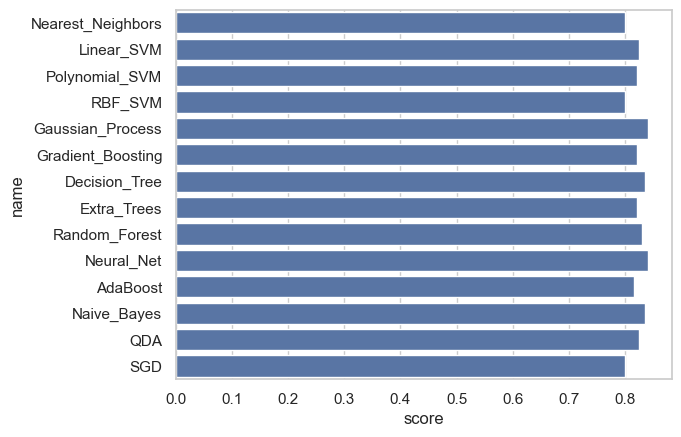

In [35]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)